# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("data/house_prices.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

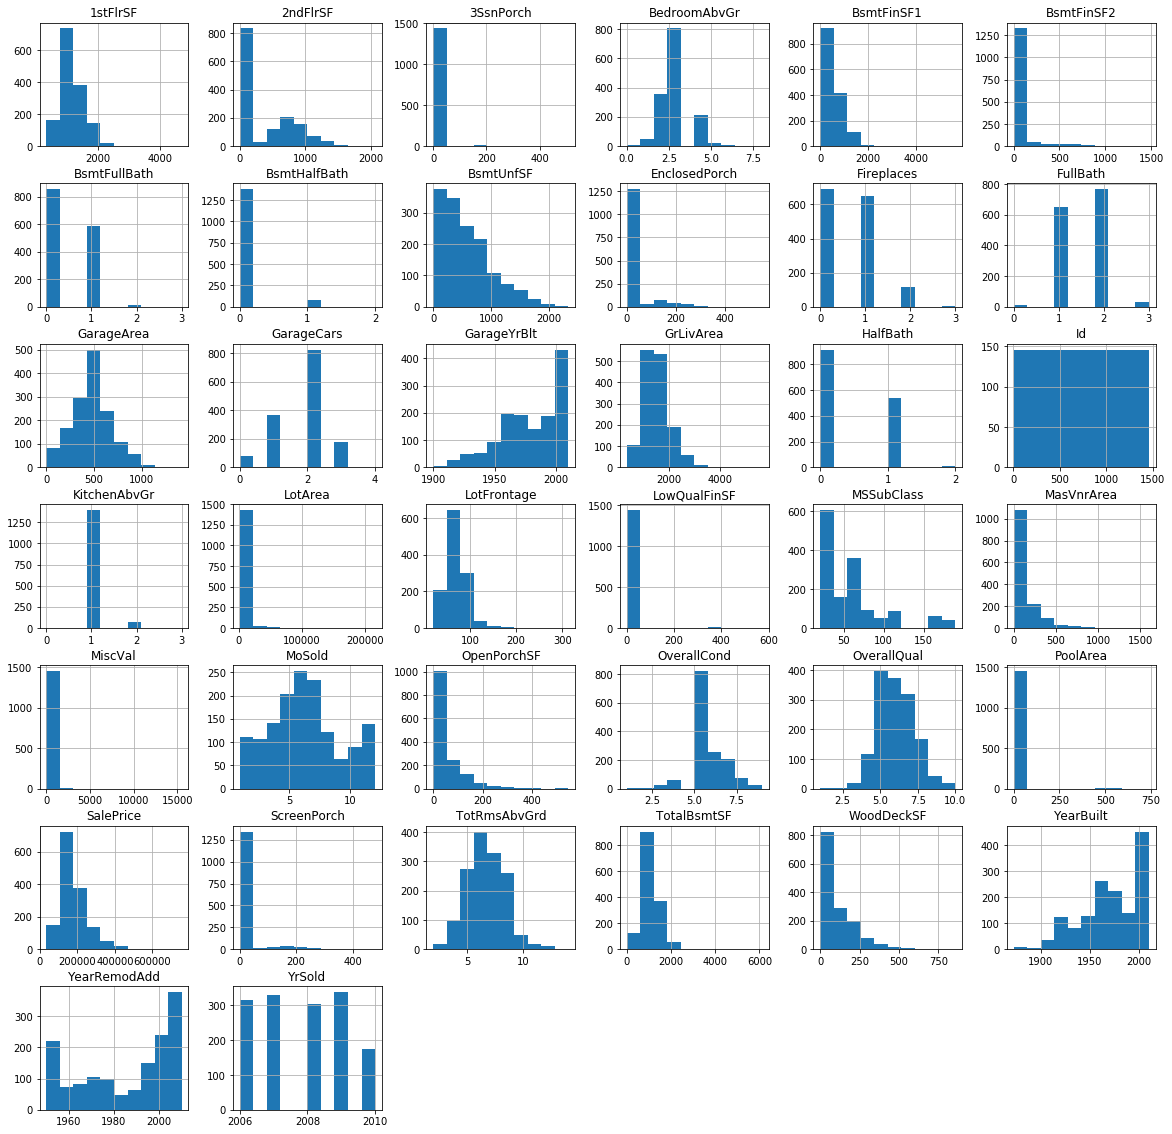

In [9]:

df.hist(figsize=(20,20));

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:

df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [15]:
df.MSZoning.unique

<bound method Series.unique of 0       RL
1       RL
2       RL
3       RL
4       RL
5       RL
6       RL
7       RL
8       RM
9       RL
10      RL
11      RL
12      RL
13      RL
14      RL
15      RM
16      RL
17      RL
18      RL
19      RL
20      RL
21      RM
22      RL
23      RM
24      RL
25      RL
26      RL
27      RL
28      RL
29      RM
        ..
1430    RL
1431    RL
1432    RL
1433    RL
1434    RL
1435    RL
1436    RL
1437    RL
1438    RM
1439    RL
1440    RL
1441    RM
1442    FV
1443    RL
1444    RL
1445    RL
1446    RL
1447    RL
1448    RL
1449    RM
1450    RL
1451    RL
1452    RM
1453    RL
1454    FV
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object>

In [14]:
df.shape

(1460, 81)

In [16]:
df.select_dtypes(float64)

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
5,85.0,0.0,1993.0
6,75.0,186.0,2004.0
7,NaN,240.0,1973.0
8,51.0,0.0,1931.0
9,50.0,0.0,1939.0


In [17]:
df.select_dtypes(int64)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,118000


In [18]:
df.YearBuilt = df.YearBuilt.astype(str)

In [21]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt         object
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


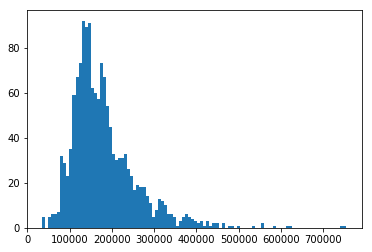

In [27]:
figsize=(20,20)
plt.hist(df.SalePrice, bins=100);

In [29]:
df_wo_outliers = df[(df.LotArea < 50000) & (df.SalePrice < 600000)].copy()

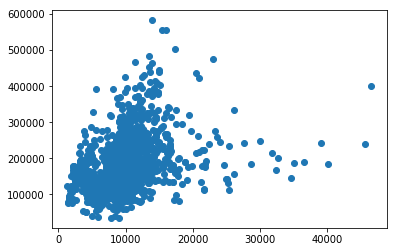

In [30]:
plt.scatter(df_wo_outliers.LotArea, df_wo_outliers.SalePrice)

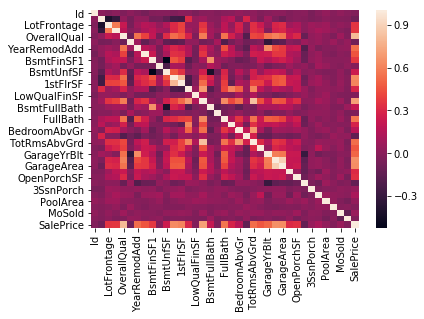

In [33]:
import seaborn as sns
#plt.figure(figsize=(20,20))
sns.heatmap(df_wo_outliers.corr());

Lo que está mas claro es lo mas correlado

In [37]:
df_wo_outliers.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011851,-0.026452,0.003551,-0.033598,0.014640,-0.022689,-0.062363,-0.013901,-0.004524,...,-0.022318,-0.001572,0.001664,-0.046977,0.000836,0.040893,-0.004661,0.025728,-0.002609,-0.026688
MSSubClass,0.011851,1.000000,-0.408048,-0.317287,0.036809,-0.061947,0.042647,0.026118,-0.072892,-0.064815,...,-0.018974,-0.004451,-0.012287,-0.044276,-0.026980,0.007879,-0.010840,-0.014314,-0.021356,-0.084941
LotFrontage,-0.026452,-0.408048,1.000000,0.577493,0.226729,-0.054745,0.083808,0.162183,0.133315,0.042883,...,0.084320,0.128165,0.018004,0.076240,0.052100,0.075697,0.005993,0.033174,0.008200,0.354329
LotArea,0.003551,-0.317287,0.577493,1.000000,0.172481,-0.003775,0.038649,0.132104,0.188099,0.095806,...,0.187209,0.152767,0.007830,0.062963,0.112183,0.082099,0.041612,-0.004164,-0.032648,0.360983
OverallQual,-0.033598,0.036809,0.226729,0.172481,1.000000,-0.088219,0.553292,0.396099,0.208578,-0.058214,...,0.229429,0.307754,-0.111536,0.032153,0.065591,0.018399,-0.030185,0.076763,-0.023513,0.806869
OverallCond,0.014640,-0.061947,-0.054745,-0.003775,-0.088219,1.000000,0.074138,-0.131844,-0.039950,0.042361,...,0.000580,-0.031421,0.070005,0.025286,0.055891,0.008006,0.067508,-0.002566,0.044914,-0.075948
YearRemodAdd,-0.022689,0.042647,0.083808,0.038649,0.553292,0.074138,1.000000,0.172444,0.121043,-0.061556,...,0.209409,0.222423,-0.193003,0.045744,-0.040713,-0.009510,-0.009906,0.026159,0.037690,0.533348
MasVnrArea,-0.062363,0.026118,0.162183,0.132104,0.396099,-0.131844,0.172444,1.000000,0.230035,-0.068531,...,0.148115,0.119479,-0.109433,0.021557,0.061481,-0.016024,-0.030773,0.011414,-0.005990,0.454479
BsmtFinSF1,-0.013901,-0.072892,0.133315,0.188099,0.208578,-0.039950,0.121043,0.230035,1.000000,-0.053952,...,0.181776,0.083515,-0.099986,0.031612,0.068375,0.017261,0.003957,0.001923,0.015684,0.367577
BsmtFinSF2,-0.004524,-0.064815,0.042883,0.095806,-0.058214,0.042361,-0.061556,-0.068531,-0.053952,1.000000,...,0.076134,0.008741,0.036847,-0.029979,0.091590,0.053880,0.004810,-0.015686,0.026394,-0.012997


In [41]:
for col in df.columns:
    print(col)
    lenght = len(df[df['CentralAir'].isnull()])
    if (lenght != 0): print(col)

Id
MSSubClass
MSZoning
LotFrontage
LotArea
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
PoolQC
Fence
MiscFeature
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice


In [43]:
print(len(df_wo_outliers))
print(len(df_wo_outliers.dropna()))

1445
0


In [97]:
col1 = [['A','B','C'],['A','B','C'],['A','B','C']]
df = pd.DataFrame(col1)

In [98]:
df.columns = ["uno", "dos", "tres"]
df

,uno,dos,tres
0,A,B,C
1,A,B,C
2,A,B,C


In [99]:
df2 = df
df3 = df[["uno","dos"]]
df2

,uno,dos,tres
0,A,B,C
1,A,B,C
2,A,B,C


In [100]:
df3

,uno,dos
0,A,B
1,A,B
2,A,B


In [101]:
df["uno"] = "BBBB"
df

,uno,dos,tres
0,BBBB,B,C
1,BBBB,B,C
2,BBBB,B,C


In [102]:
df2

,uno,dos,tres
0,BBBB,B,C
1,BBBB,B,C
2,BBBB,B,C


In [106]:
df3

,uno,dos
0,A,B
1,A,B
2,A,B


In [75]:
df2["uno"]= "CCCCC"

In [50]:
from sklearn.preprocessing import Imputer

In [105]:
df

,uno,dos,tres
0,BBBB,B,C
1,BBBB,B,C
2,BBBB,B,C


In [108]:
df2["uno"]="AAAAA"
df2

,uno,dos,tres
0,AAAAA,B,C
1,AAAAA,B,C
2,AAAAA,B,C


In [109]:
df

,uno,dos,tres
0,AAAAA,B,C
1,AAAAA,B,C
2,AAAAA,B,C


In [51]:
imputer = Imputer

In [55]:
# te reemplaza los nan por la media de la columna
imputer.fit_transform(df_wo_outliers["LotFrontage"])

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [54]:
df_wo_outliers[["LotFrontage"]]

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
5,85.0
6,75.0
7,NaN
8,51.0
9,50.0
